<a href="https://colab.research.google.com/github/OlehVorobiov/Math-2024-25-Winter/blob/main/docs/Interactives/CircuitGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing Equivalent Resistance Algorithm

Case Study 1: Simple Series/Parallel Circuit
Description: R1 and R2 in series, in parallel with R3


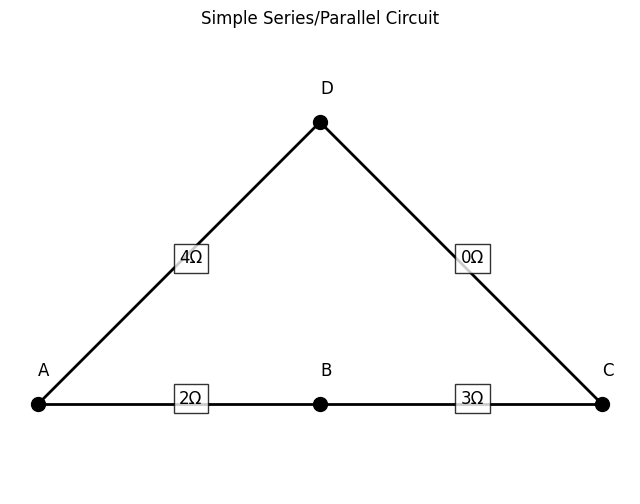

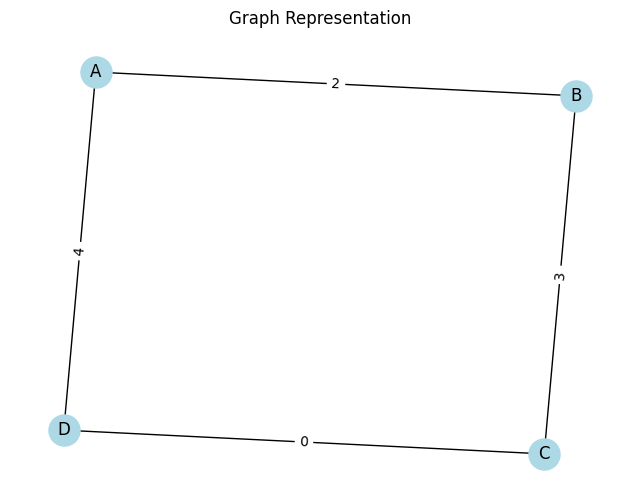

Equivalent Resistance (A to C): 5.00Ω

Case Study 2: Nested Combination Circuit
Description: R1 in series with (R2 parallel R3), then parallel with R4


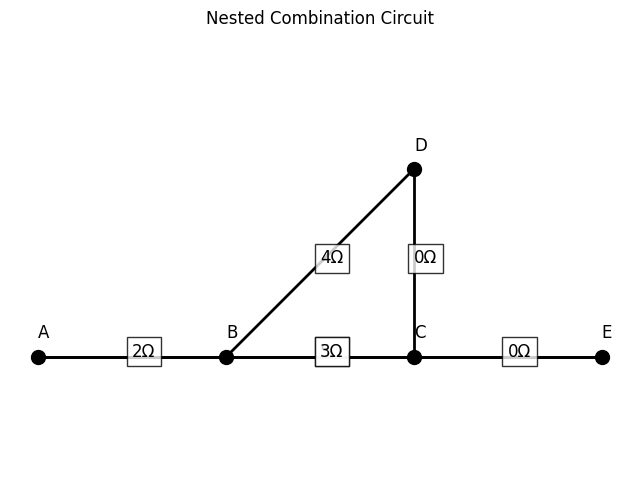

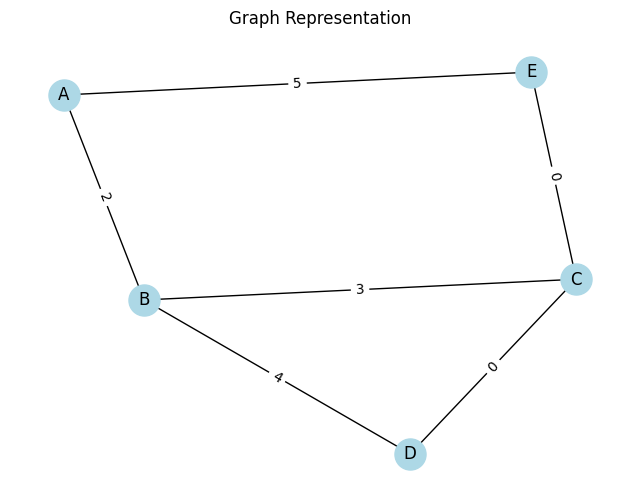

Equivalent Resistance (A to E): 5.00Ω

Case Study 3: Wheatstone Bridge
Description: R1, R2, R3, R4 in bridge with R5 across


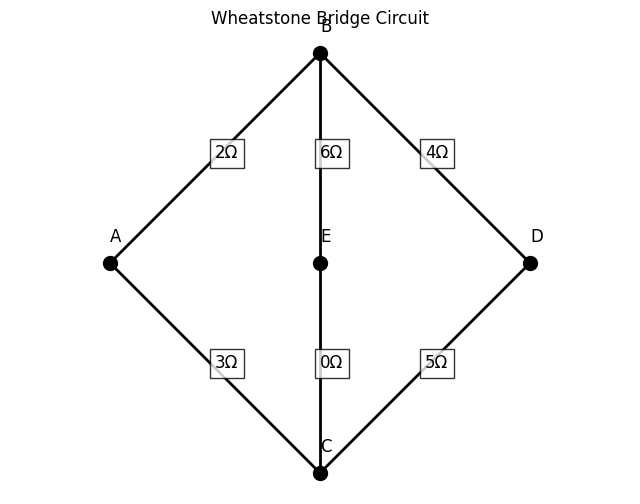

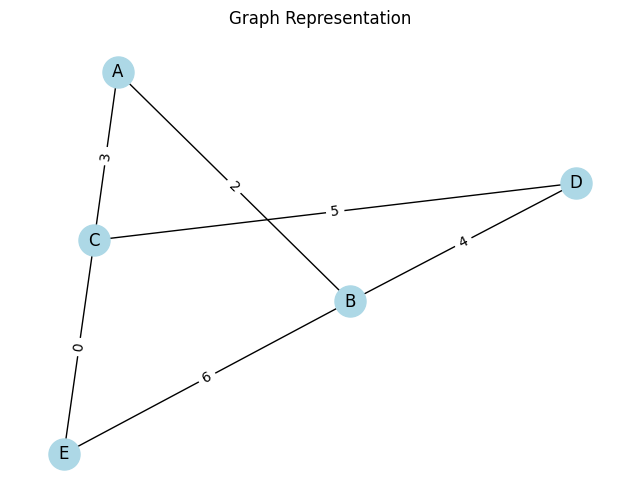

Equivalent Resistance (A to D): 3.43Ω


In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_circuit_diagram(G, positions, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    for u, v, data in G.edges(data=True):
        r = data['resistance']
        x = [positions[u][0], positions[v][0]]
        y = [positions[u][1], positions[v][1]]
        ax.plot(x, y, 'k-', lw=2)
        mid_x, mid_y = (x[0] + x[1]) / 2, (y[0] + y[1]) / 2
        ax.text(mid_x, mid_y, f'{r}Ω', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    for node, (x, y) in positions.items():
        ax.plot(x, y, 'o', ms=10, color='black')
        ax.text(x, y + 0.1, node, fontsize=12)
    ax.set_title(title)
    ax.axis('equal')
    ax.axis('off')
    plt.show()

def draw_graph(G, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'resistance')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    ax.set_title(title)
    plt.show()

def compute_equivalent_resistance(G, source, sink):
    """Compute equivalent resistance between source and sink using nodal analysis."""
    nodes = list(G.nodes())
    n = len(nodes)
    node_index = {node: i for i, node in enumerate(nodes)}

    # Initialize conductance matrix
    G_matrix = np.zeros((n, n))
    for u, v, data in G.edges(data=True):
        resistance = data['resistance']
        if resistance == 0:  # Handle zero resistance (wire)
            continue
        conductance = 1 / resistance
        u_idx, v_idx = node_index[u], node_index[v]
        G_matrix[u_idx, u_idx] += conductance
        G_matrix[v_idx, v_idx] += conductance
        G_matrix[u_idx, v_idx] -= conductance
        G_matrix[v_idx, u_idx] -= conductance

    # Set up current vector (1A from source to sink)
    I = np.zeros(n)
    I[node_index[source]] = 1
    I[node_index[sink]] = -1

    # Solve for voltages (G_matrix * V = I)
    try:
        V = np.linalg.solve(G_matrix, I)
    except np.linalg.LinAlgError:
        return float('inf')  # Singular matrix (e.g., disconnected graph)

    # Compute equivalent resistance
    V_diff = V[node_index[source]] - V[node_index[sink]]
    R_eq = V_diff / 1  # I_test = 1A
    return R_eq

# Case Study 1: Simple Series/Parallel
def simple_series_parallel():
    print("Case Study 1: Simple Series/Parallel Circuit")
    print("Description: R1 and R2 in series, in parallel with R3")

    G = nx.Graph()
    G.add_edge('A', 'B', resistance=2)
    G.add_edge('B', 'C', resistance=3)
    G.add_edge('A', 'D', resistance=4)
    G.add_edge('D', 'C', resistance=0)  # Wire

    positions = {'A': (0, 0), 'B': (1, 0), 'C': (2, 0), 'D': (1, 1)}
    draw_circuit_diagram(G, positions, "Simple Series/Parallel Circuit")
    draw_graph(G, "Graph Representation")

    R_eq = compute_equivalent_resistance(G, 'A', 'C')
    print(f"Equivalent Resistance (A to C): {R_eq:.2f}Ω")

    return R_eq

# Case Study 2: Nested Combination
def nested_combination():
    print("\nCase Study 2: Nested Combination Circuit")
    print("Description: R1 in series with (R2 parallel R3), then parallel with R4")

    G = nx.Graph()
    G.add_edge('A', 'B', resistance=2)
    G.add_edge('B', 'C', resistance=3)
    G.add_edge('B', 'D', resistance=4)
    G.add_edge('D', 'C', resistance=0)
    G.add_edge('C', 'E', resistance=0)
    G.add_edge('A', 'E', resistance=5)

    positions = {'A': (0, 0), 'B': (1, 0), 'C': (2, 0), 'D': (2, 1), 'E': (3, 0)}
    draw_circuit_diagram(G, positions, "Nested Combination Circuit")
    draw_graph(G, "Graph Representation")

    R_eq = compute_equivalent_resistance(G, 'A', 'E')
    print(f"Equivalent Resistance (A to E): {R_eq:.2f}Ω")

    return R_eq

# Case Study 3: Wheatstone Bridge
def wheatstone_bridge():
    print("\nCase Study 3: Wheatstone Bridge")
    print("Description: R1, R2, R3, R4 in bridge with R5 across")

    G = nx.Graph()
    G.add_edge('A', 'B', resistance=2)
    G.add_edge('A', 'C', resistance=3)
    G.add_edge('B', 'D', resistance=4)
    G.add_edge('C', 'D', resistance=5)
    G.add_edge('B', 'E', resistance=6)
    G.add_edge('E', 'C', resistance=0)

    positions = {'A': (0, 0), 'B': (1, 1), 'C': (1, -1), 'D': (2, 0), 'E': (1, 0)}
    draw_circuit_diagram(G, positions, "Wheatstone Bridge Circuit")
    draw_graph(G, "Graph Representation")

    R_eq = compute_equivalent_resistance(G, 'A', 'D')
    print(f"Equivalent Resistance (A to D): {R_eq:.2f}Ω")

    return R_eq

# Main Execution
def main():
    print("Testing Equivalent Resistance Algorithm\n")
    simple_series_parallel()
    nested_combination()
    wheatstone_bridge()

if __name__ == "__main__":
    main()